## Problem Statement-

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## 1. Dataset Preparation

In [1]:
# Importing libraries necessary for the study
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics

### 1.2 Reading Data file

In [2]:
#Reading Train data
train = pd.read_csv("/Users/rgaur/Downloads/digit-recognizer/train.csv")
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
#Reading test data
test = pd.read_csv("/Users/rgaur/Downloads/digit-recognizer/test.csv")
print(test.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

### 1.3 Data Inspection

In [4]:
train.shape

(42000, 785)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [38]:
four=train.iloc[3,1:]
four.shape

(784,)

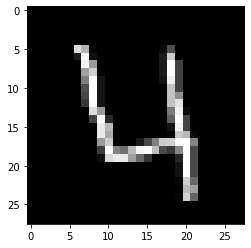

In [39]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [10]:
# Summarise count in terms of percentage 
100*(round(train.label.astype('category').value_counts()/len(train.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

## 2. Data Cleaning

In [11]:
#Let's now check the count of missing values 
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## 3. Data Preparation for Model Building

In [12]:
# splitting into X and y
X = train.drop("label", axis = 1)
y = train.label.values.astype(int)

In [13]:
# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

In [14]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, random_state = 4)

### Linear SVM Model

In [15]:
# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#predict 
y_pred = svm_linear.predict(X_test)
y_pred[:10]

array([0, 4, 0, 3, 7, 7, 9, 5, 8, 7])

In [17]:
#confusion Matrix
metrics.confusion_matrix(y_test, y_pred)

array([[3565,    0,   15,    6,   16,   45,   36,    1,   14,    3],
       [   0, 4137,   15,    5,    1,    4,    4,    6,   28,    8],
       [  58,   37, 3349,   74,   42,   18,   43,   67,   49,   20],
       [  15,   29,  113, 3418,   10,  195,   17,   36,   49,   40],
       [  10,   21,   35,    5, 3441,    9,   23,   13,    3,   94],
       [  41,   61,   20,  194,   40, 2918,   61,    3,   69,   24],
       [  42,    6,   53,    1,   46,   43, 3502,    1,   17,    0],
       [  14,   41,   41,   12,   74,   10,    2, 3551,    3,  209],
       [  33,   75,   45,  127,   41,  113,   31,   32, 3127,   56],
       [  30,   26,   18,   52,  243,   21,    1,  179,   23, 3186]])

In [18]:
#Accuracy Score
metrics.accuracy_score(y_test, y_pred)

0.9046031746031746

In [19]:
#classification report
classification=metrics.classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3701
           1       0.93      0.98      0.96      4208
           2       0.90      0.89      0.90      3757
           3       0.88      0.87      0.87      3922
           4       0.87      0.94      0.90      3654
           5       0.86      0.85      0.86      3431
           6       0.94      0.94      0.94      3711
           7       0.91      0.90      0.91      3957
           8       0.92      0.85      0.89      3680
           9       0.88      0.84      0.86      3779

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



### Non-Linear SVM Model

In [20]:
# SVM model with Non-linear kernel  
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# predict
y_pred = svm_rbf.predict(X_test)

# accuracy 
print(metrics.accuracy_score(y_test, y_pred))

0.9224074074074075


Accuracy achieved by Non-linear SVM model is higher than Linear SVM model.

### Grid Search Cross-Validation

In [22]:
# Perform grid search CV to tune the hyperparameters C and gamma.
parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.803920,0.216637,2.547290,0.014900,1,0.01,"{'C': 1, 'gamma': 0.01}",0.694048,0.676190,0.703571,0.707143,0.709524,0.698095,0.012155,9
1,5.487626,0.026974,1.663869,0.010831,1,0.001,"{'C': 1, 'gamma': 0.001}",0.920238,0.911905,0.917857,0.905952,0.916667,0.914524,0.005073,3
2,8.124085,0.042606,2.198278,0.020107,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.897619,0.880952,0.877381,0.873810,0.885714,0.883095,0.008262,6
3,17.851814,0.094168,2.542041,0.008358,10,0.01,"{'C': 10, 'gamma': 0.01}",0.707143,0.698810,0.719048,0.722619,0.728571,0.715238,0.010791,7
4,4.703100,0.028680,1.520258,0.015513,10,0.001,"{'C': 10, 'gamma': 0.001}",0.934524,0.917857,0.919048,0.919048,0.922619,0.922619,0.006163,1
5,3.678530,0.025131,1.400038,0.010721,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.922619,0.914286,0.907143,0.917857,0.910714,0.914524,0.005398,3
6,17.677260,0.085929,2.535575,0.008501,100,0.01,"{'C': 100, 'gamma': 0.01}",0.707143,0.698810,0.719048,0.722619,0.728571,0.715238,0.010791,7
7,4.672204,0.020285,1.513045,0.013120,100,0.001,"{'C': 100, 'gamma': 0.001}",0.932143,0.914286,0.917857,0.919048,0.917857,0.920238,0.006163,2
8,2.851483,0.048303,1.175801,0.006406,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.928571,0.910714,0.903571,0.920238,0.905952,0.913810,0.009331,5


In [24]:
clf.best_params_

{'C': 10, 'gamma': 0.001}

### Final Model

In [25]:
best_C = 10
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, y_train)

# predict
y_pred = svm_final.predict(X_test)

In [26]:
X_test.shape

(37800, 784)

In [27]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

print("confusion matrix",metrics.confusion_matrix(y_test, y_pred))


accuracy 0.9348412698412698
confusion matrix [[3586    0   36    6    8   17   29    2   17    0]
 [   0 4141   28    6    2    2    4    5   12    8]
 [  30   23 3510   41   28    5   29   57   28    6]
 [  10   15  120 3537    8  112    6   47   43   24]
 [   2   13   44    4 3472   10   21   19    5   64]
 [   9   20   48   96   20 3131   53    7   23   24]
 [  27    3   50    0   21   33 3561    1   15    0]
 [   7   30   80    8   42    6    1 3676    1  106]
 [  15   50   53   70   25   68   24   22 3302   51]
 [  16   14   38   55  105    7    0  104   19 3421]]


In [28]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.shape

(28000, 784)

In [31]:
# Rescaling the features
from sklearn.preprocessing import scale
test = scale(test)

In [32]:
prediction = svm_final.predict(test)

In [33]:
prediction

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
image_id = np.arange(1,prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": prediction}).to_csv('svm_submission.csv', 
                                                                      index=False, header=True)